In [ ]:
#intitialize google drive 
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#importing libraries
import os,sys
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn 
import torch.optim as optim
import torch.nn as nn

In [ ]:
#Transform function to convert image into tensor and resize them
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

In [ ]:
#Initialize Data
trainset = '/content/drive/MyDrive/Data'

In [ ]:
#Intializing training and testing data,converting transforming and loading them using Dataloader
train_data = ImageFolder(trainset+'/Train', transform=transform)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)

test_data=ImageFolder(trainset+'/Test', transform=transform)
testloader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=True, num_workers=2)

classes = sorted(os.listdir(trainset + "/Train"))
num_classes=len(classes)

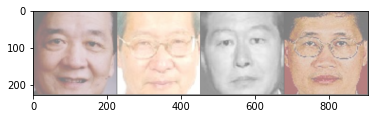

0013_0001713 0013_0002423 0007_0000677 0007_0000760


In [ ]:
def show_images(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.show_images(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#Show images
show_images(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
class CNN(nn.Module):

    def __init__(self,):
        super().__init__()
        self.features = nn.Sequential(
            # Defining a 2D convolution layer
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            # Adding an activation function
            nn.ReLU(inplace=True),
            # Applying maxpool function to reduce the size
            nn.MaxPool2d(kernel_size=3, stride=2),
            # Defining another 2D convolution layer(2)
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            # Defining another 2D convolution layer(3)
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            # Defining another 2D convolution layer(4)
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            # Defining another 2D convolution layer(5)
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            # adding dropout
            nn.Dropout(),
            #converting the output from features into a linear layer
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )
    #returns the output of the network  for a given image  
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [ ]:
#Checks for availability of GPU and loads the model in it
model = CNN()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
device
model.to(device)

CNN(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (

In [ ]:
#Defining the optimizer and loss functions 
criterion = nn.CrossEntropyLoss()#cross-entropy is used for the loss.
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9) #Stochastic gradient descent is used as optimizer

In [ ]:
# Training the model 
for epoch in range(40):  # loop over the dataset 40 times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Done training')

[1,  2000] loss: 6.921
[2,  2000] loss: 6.920
[3,  2000] loss: 6.920
[4,  2000] loss: 6.919
[5,  2000] loss: 6.918
[6,  2000] loss: 6.918
[7,  2000] loss: 6.917
[8,  2000] loss: 6.916
[9,  2000] loss: 6.915
[10,  2000] loss: 6.915
[11,  2000] loss: 6.914
[12,  2000] loss: 6.913
[13,  2000] loss: 6.912
[14,  2000] loss: 6.908
[15,  2000] loss: 6.889
[16,  2000] loss: 6.878
[17,  2000] loss: 6.867
[18,  2000] loss: 6.865
[19,  2000] loss: 6.862
[20,  2000] loss: 6.862
[21,  2000] loss: 6.860
[22,  2000] loss: 6.857
[23,  2000] loss: 6.853
[24,  2000] loss: 6.850
[25,  2000] loss: 6.844
[26,  2000] loss: 6.823
[27,  2000] loss: 6.763
[28,  2000] loss: 6.652
[29,  2000] loss: 6.546
[30,  2000] loss: 6.372
[31,  2000] loss: 6.094
[32,  2000] loss: 5.710
[33,  2000] loss: 5.106
[34,  2000] loss: 4.494
[35,  2000] loss: 3.829
[36,  2000] loss: 3.127
[37,  2000] loss: 2.446
[38,  2000] loss: 1.886
[39,  2000] loss: 1.379
[40,  2000] loss: 1.040
Done training


In [ ]:
#Saving the trained model
torch.save(model, "/content/drive/MyDrive/ML/model.pt")

In [ ]:
   #Move tensor(s) to chosen device
def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [ ]:
def predict(img, model):
    # Convert to a batch of 1
    x = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    y = model(x)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return test_data.classes[preds[0].item()]

In [ ]:
id = input("Enter employee ID: ")
index = classes.index(id)

img, label = train_data[index]
print('Label:', test_data.classes[label], ', Predicted:', predict(img, model))
if test_data.classes[label]==predict(img, model):
  print("It's a Match !")
else:
  print('No record found')

Enter employee ID: 0001_0000254
Label: 0001_0000254 , Predicted: 0001_0000254
It's a Match !
